In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
import seaborn as sns
from scipy import stats
import pylab as pl
%matplotlib inline

# Import Dataset

In [4]:
hd = pd.read_excel (r'C:\Users\timohakartoha\Desktop\SENECA\BAN 240 Consulting Capstone Course\Data Preproccessing\Dataset 1+2.xlsx')
print (hd)


       Unnamed: 0                                              title  \
0             0.0  1303 - 38 Grenville St, Toronto (C4461599) | Z...   
1             1.0          2 Cabot Crt, Toronto (W4502992) | Zoocasa   
2             2.0  1504 - 30 Roehampton Ave, Toronto (C4511330) |...   
3             3.0  514 - 65 East Liberty St, Toronto (C4515763) |...   
4             4.0        61 Twelfth St, Toronto (W4519375) | Zoocasa   
...           ...                                                ...   
42877         NaN                                                NaN   
42878         NaN                                                NaN   
42879         NaN                                                NaN   
42880         NaN                                                NaN   
42881         NaN                                                NaN   

       final_price  list_price    bedrooms bathrooms             sqft  \
0         855000.0    870000.0  2 + 1 beds   2 baths  800–899 

In [5]:
hd.head(5)

,Unnamed: 0,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_link,full_address,lat,long,city_district
0,0.0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000.0,870000.0,2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",NaN,NaN,NaN
1,1.0,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000.0,898000.0,3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,https://www.zoocasa.com/toronto-on-real-estate...,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,2.0,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000.0,549900.0,1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,3.0,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000.0,600000.0,1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,4.0,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513.0,839000.0,2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"61 Twelfth St, Toronto",NaN,NaN,NaN


# Data types


In [6]:
hd.dtypes

Unnamed: 0       float64
title             object
final_price      float64
list_price       float64
bedrooms          object
bathrooms         object
sqft              object
parking           object
description       object
mls               object
type              object
full_link         object
full_address      object
lat              float64
long             float64
city_district    float64
dtype: object

In [7]:
for col in hd.columns:
    print(f'{col :30s} >>>>      {hd[col].unique()}')

Unnamed: 0                     >>>>      [0.0000e+00 1.0000e+00 2.0000e+00 ... 1.7542e+04 1.7543e+04        nan]
title                          >>>>      ['1303 - 38 Grenville St, Toronto (C4461599) | Zoocasa'
 '2 Cabot Crt, Toronto (W4502992) | Zoocasa'
 '1504 - 30 Roehampton Ave, Toronto (C4511330) | Zoocasa' ...
 '1706 - 365 Church St, Toronto (C4330888) | Zoocasa'
 '43 Kalmar Ave, Toronto (E4331128) | Zoocasa' nan]
final_price                    >>>>      [855000. 885000. 550000. ... 799997. 240500. 384888.]
list_price                     >>>>      [ 870000.  898000.  549900. ... 1619900.  308000.  559980.]
bedrooms                       >>>>      ['2 + 1 beds' '3 beds' '1 beds' '1 + 1 beds' '2 beds' '0 beds' '4 beds'
 '3 + 1 beds' '4 + 2 beds' '2 + 3 beds' '4 + 1 beds' '3 + 2 beds'
 '3 + 3 beds' '5 beds' '4 + 3 beds' '5 + 1 beds' nan '2 + 2 beds'
 '5 + 2 beds' '6 + 2 beds' '6 + 1 beds' '6 beds' '1 + 2 beds' '0 + 1 beds'
 '3 + 4 beds' '5 + 3 beds' '8 + 3 beds' '8 beds' '6 + 3 beds'

# Delete some features : Unnamed: 0, title, full_link 

In [8]:
hd = hd.drop(['title', 'full_link'], axis=1)

In [9]:
hd.head(5)

,Unnamed: 0,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_address,lat,long,city_district
0,0.0,855000.0,870000.0,2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,1.0,885000.0,898000.0,3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,2.0,550000.0,549900.0,1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,3.0,665000.0,600000.0,1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,4.0,825513.0,839000.0,2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


In [10]:
hd.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)         

In [11]:
hd.drop(["a"], axis=1, inplace=True)

In [12]:
hd.head(5)

,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_address,lat,long,city_district
0,855000.0,870000.0,2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


# Rename Columns

In [13]:
hd.rename({"final_price":"Price"}, axis="columns", inplace=True) 
hd.rename({"list_price":"Listing Price"}, axis="columns", inplace=True)
hd.rename({"bedrooms":"Number of Bedrooms"}, axis="columns", inplace=True) 
hd.rename({"bathrooms":"Number of Bathrooms"}, axis="columns", inplace=True) 
hd.rename({"sqft":"Square Feet"}, axis="columns", inplace=True) 
hd.rename({"parking":"Number of Parking Spaces"}, axis="columns", inplace=True) 
hd.rename({"description":"Description"}, axis="columns", inplace=True) 
hd.rename({"mls":"MLS"}, axis="columns", inplace=True) 
hd.rename({"mls":"MLS"}, axis="columns", inplace=True)
hd.rename({"type":"Building Type"}, axis="columns", inplace=True) 
hd.rename({"full_address":"Address"}, axis="columns", inplace=True) 
hd.rename({"lat":"Latitude"}, axis="columns", inplace=True) 
hd.rename({"long":"Longitude"}, axis="columns", inplace=True)
hd.rename({"city_district":"City District"}, axis="columns", inplace=True)

In [14]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.0,870000.0,2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


In [15]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms           object
Number of Bathrooms          object
Square Feet                  object
Number of Parking Spaces     object
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
dtype: object

# Missing Values:

In [16]:
missing_data = hd.isnull()
missing_data.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True


In [17]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')

Price
False    42756
True       126
Name: Price, dtype: int64

Listing Price
True     25477
False    17405
Name: Listing Price, dtype: int64

Number of Bedrooms
True     25477
False    17405
Name: Number of Bedrooms, dtype: int64

Number of Bathrooms
True     25477
False    17405
Name: Number of Bathrooms, dtype: int64

Square Feet
True     25477
False    17405
Name: Square Feet, dtype: int64

Number of Parking Spaces
True     25477
False    17405
Name: Number of Parking Spaces, dtype: int64

Description
True     25537
False    17345
Name: Description, dtype: int64

MLS
True     25351
False    17531
Name: MLS, dtype: int64

Building Type
True     25477
False    17405
Name: Building Type, dtype: int64

Address
False    42696
True       186
Name: Address, dtype: int64

Latitude
False    25351
True     17531
Name: Latitude, dtype: int64

Longitude
False    25351
True     17531
Name: Longitude, dtype: int64

City District
True    42882
Name: City District, dtype: int64



# Correct Types of Features:

# Changing Number of Bedrooms from categorical to numeric

In [18]:
hd['Number of Bedrooms']. describe()

count      17405
unique        48
top       2 beds
freq        3314
Name: Number of Bedrooms, dtype: object

In [19]:
hd['Number of Bedrooms'].unique()

array(['2 + 1 beds', '3 beds', '1 beds', '1 + 1 beds', '2 beds', '0 beds',
       '4 beds', '3 + 1 beds', '4 + 2 beds', '2 + 3 beds', '4 + 1 beds',
       '3 + 2 beds', '3 + 3 beds', '5 beds', '4 + 3 beds', '5 + 1 beds',
       nan, '2 + 2 beds', '5 + 2 beds', '6 + 2 beds', '6 + 1 beds',
       '6 beds', '1 + 2 beds', '0 + 1 beds', '3 + 4 beds', '5 + 3 beds',
       '8 + 3 beds', '8 beds', '6 + 3 beds', '4 + 4 beds', '7 + 3 beds',
       '7 + 1 beds', '9 + 5 beds', '9 + 3 beds', '7 + 4 beds', '9 beds',
       '9 + 1 beds', '9 + 2 beds', '5 + 5 beds', '4 + 5 beds',
       '8 + 2 beds', '7 beds', '6 + 4 beds', '4 + 6 beds', '5 + 6 beds',
       '8 + 4 beds', '9 + 4 beds', '7 + 2 beds', '2 + 4 beds'],
      dtype=object)

In [20]:
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('beds', ' ', regex=True)

In [21]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.0,870000.0,2 + 1,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,1 + 1,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


In [22]:
hd['Number of Bedrooms'].unique()

array(['2 + 1  ', '3  ', '1  ', '1 + 1  ', '2  ', '0  ', '4  ', '3 + 1  ',
       '4 + 2  ', '2 + 3  ', '4 + 1  ', '3 + 2  ', '3 + 3  ', '5  ',
       '4 + 3  ', '5 + 1  ', nan, '2 + 2  ', '5 + 2  ', '6 + 2  ',
       '6 + 1  ', '6  ', '1 + 2  ', '0 + 1  ', '3 + 4  ', '5 + 3  ',
       '8 + 3  ', '8  ', '6 + 3  ', '4 + 4  ', '7 + 3  ', '7 + 1  ',
       '9 + 5  ', '9 + 3  ', '7 + 4  ', '9  ', '9 + 1  ', '9 + 2  ',
       '5 + 5  ', '4 + 5  ', '8 + 2  ', '7  ', '6 + 4  ', '4 + 6  ',
       '5 + 6  ', '8 + 4  ', '9 + 4  ', '7 + 2  ', '2 + 4  '],
      dtype=object)

In [23]:
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('2 + 1  ', 3)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('3  ', 3)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('1 + 1  ', 2)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('3 + 1  ', 4)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 2  ', 6)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('2 + 3  ', 5)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 1  ', 5)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('3 + 2  ', 5)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('3 + 3  ', 6)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 3  ', 7)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('5 + 1  ', 6)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('2 + 2  ', 4)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('5 + 2  ', 7)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('6 + 2  ', 8)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('6 + 1  ', 7)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('1 + 2  ', 3)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('0 + 1  ', 1)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('3 + 4  ', 7)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('5 + 3  ', 8)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('8 + 3  ', 11)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('6 + 3  ', 9)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 4  ', 8)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('7 + 3  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('7 + 1  ', 8)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('9 + 5  ', 14)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('9 + 3  ', 12)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('7 + 4  ', 11)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('9 + 1  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('9 + 2  ', 11)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('5 + 5  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 5  ', 9)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('8 + 2  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('6 + 4  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('4 + 6  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('5 + 6  ', 10)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('8 + 4  ', 12)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('9 + 4  ', 13)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('7 + 2  ', 9)
hd['Number of Bedrooms'] = hd['Number of Bedrooms'].replace('2 + 4  ', 6)



In [24]:
hd['Number of Bedrooms'].unique()

array([3, '1  ', 2, '2  ', '0  ', '4  ', 4, 6, 5, '5  ', 7, nan, 8, '6  ',
       1, 11, '8  ', 9, 10, 14, 12, '9  ', '7  ', 13], dtype=object)

In [25]:
hd['Number of Bedrooms'].astype('float')

0        3.0
1        3.0
2        1.0
3        2.0
4        2.0
        ... 
42877    NaN
42878    NaN
42879    NaN
42880    NaN
42881    NaN
Name: Number of Bedrooms, Length: 42882, dtype: float64

In [26]:
hd['Number of Bedrooms'] = pd.to_numeric(hd['Number of Bedrooms'], errors='coerce')

Now Type of Number of Bedrooms is float64 instead of object

In [27]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms          float64
Number of Bathrooms          object
Square Feet                  object
Number of Parking Spaces     object
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
dtype: object

In [28]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.0,870000.0,3.0,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3.0,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1.0,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,2.0,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2.0,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


# Changing Number of Bedrooms from categorical to numeric¶

In [29]:
hd['Number of Bedrooms'].unique()

array([ 3.,  1.,  2.,  0.,  4.,  6.,  5.,  7., nan,  8., 11.,  9., 10.,
       14., 12., 13.])

In [30]:
hd['Number of Bathrooms'] = hd['Number of Bathrooms'].replace('baths', ' ', regex=True)

In [31]:
hd['Number of Bathrooms'].astype('float')

0        2.0
1        2.0
2        1.0
3        1.0
4        2.0
        ... 
42877    NaN
42878    NaN
42879    NaN
42880    NaN
42881    NaN
Name: Number of Bathrooms, Length: 42882, dtype: float64

In [32]:
hd['Number of Bathrooms'] = pd.to_numeric(hd['Number of Bathrooms'], errors='coerce')

In [33]:
# Now Type of Number of Bathrooms is float64 instead of object

In [34]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms          float64
Number of Bathrooms         float64
Square Feet                  object
Number of Parking Spaces     object
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
dtype: object

In [35]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.0,870000.0,3.0,2.0,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3.0,2.0,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1.0,1.0,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,2.0,1.0,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2.0,2.0,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


# Changing Number of Parking Spaces from categorical to numeric

In [36]:
hd['Number of Parking Spaces'] = hd['Number of Parking Spaces'].replace('parking', ' ', regex=True)
hd['Number of Parking Spaces'] = hd['Number of Parking Spaces'].replace('no parking', 'NaN', regex=True)
hd['Number of Parking Spaces'] = hd['Number of Parking Spaces'].replace('no  ', 'NaN', regex=True)

In [37]:
hd['Number of Parking Spaces'].astype('float')

0        1.0
1        6.0
2        NaN
3        1.0
4        1.0
        ... 
42877    NaN
42878    NaN
42879    NaN
42880    NaN
42881    NaN
Name: Number of Parking Spaces, Length: 42882, dtype: float64

In [38]:
hd['Number of Parking Spaces'] = pd.to_numeric(hd['Number of Parking Spaces'], errors='coerce')

In [39]:
# Now Type of Number of Parking Spaces is float instead of object

In [40]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms          float64
Number of Bathrooms         float64
Square Feet                  object
Number of Parking Spaces    float64
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
dtype: object

In [41]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.0,870000.0,3.0,2.0,800–899 sq. ft.,1.0,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",NaN,NaN,NaN
1,885000.0,898000.0,3.0,2.0,N/A sq. ft.,6.0,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,550000.0,549900.0,1.0,1.0,500–599 sq. ft.,NaN,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,665000.0,600000.0,2.0,1.0,600–699 sq. ft.,1.0,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,825513.0,839000.0,2.0,2.0,N/A sq. ft.,1.0,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",NaN,NaN,NaN


# Changing Square Feet from categorical to numeric

In [42]:
hd['Square Feet'].unique()

array(['800–899 sq. ft.', 'N/A sq. ft.', '500–599 sq. ft.',
       '600–699 sq. ft.', '0-499 sq. ft.', '2500–3000 sq. ft.',
       '1000–1199 sq. ft.', '1100–1500 sq. ft.', '3000–3500 sq. ft.',
       '1500–2000 sq. ft.', '700–799 sq. ft.', '700–1100 sq. ft.',
       '2250–2499 sq. ft.', '1200–1399 sq. ft.', '900–999 sq. ft.',
       '2000–2500 sq. ft.', '1800–1999 sq. ft.', '2000–2249 sq. ft.',
       '1400–1599 sq. ft.', '3500–5000 sq. ft.', nan, '1600–1799 sq. ft.',
       '4250–4499 sq. ft.', '700–899 sq. ft.', '2750–2999 sq. ft.',
       '3250–3499 sq. ft.', '2500–2749 sq. ft.', '500–699 sq. ft.',
       '3000–3249 sq. ft.', '900–1099 sq. ft.', '1100–1299 sq. ft.',
       '4500–4749 sq. ft.'], dtype=object)

In [43]:
hd['Square Feet'] = hd['Square Feet'].replace('sq. ft.', ' ', regex=True)

In [44]:
hd['Square Feet'].unique()

array(['800–899  ', 'N/A  ', '500–599  ', '600–699  ', '0-499  ',
       '2500–3000  ', '1000–1199  ', '1100–1500  ', '3000–3500  ',
       '1500–2000  ', '700–799  ', '700–1100  ', '2250–2499  ',
       '1200–1399  ', '900–999  ', '2000–2500  ', '1800–1999  ',
       '2000–2249  ', '1400–1599  ', '3500–5000  ', nan, '1600–1799  ',
       '4250–4499  ', '700–899  ', '2750–2999  ', '3250–3499  ',
       '2500–2749  ', '500–699  ', '3000–3249  ', '900–1099  ',
       '1100–1299  ', '4500–4749  '], dtype=object)

In [45]:
hd['Square Feet'] = hd['Square Feet'].replace('800–899  ', 850)
hd['Square Feet'] = hd['Square Feet'].replace('500–599  ', 550)
hd['Square Feet'] = hd['Square Feet'].replace('600–699  ', 650)
hd['Square Feet'] = hd['Square Feet'].replace('0-499  ', 250)
hd['Square Feet'] = hd['Square Feet'].replace('2500–3000  ', 2750)
hd['Square Feet'] = hd['Square Feet'].replace('1000–1199  ', 1100)
hd['Square Feet'] = hd['Square Feet'].replace('1100–1500  ', 1350)
hd['Square Feet'] = hd['Square Feet'].replace('3000–3500  ', 3250)
hd['Square Feet'] = hd['Square Feet'].replace('1500–2000  ', 1750)
hd['Square Feet'] = hd['Square Feet'].replace('700–1100  ', 900)
hd['Square Feet'] = hd['Square Feet'].replace('2250–2499  ', 2375)
hd['Square Feet'] = hd['Square Feet'].replace('1200–1399  ', 1300)
hd['Square Feet'] = hd['Square Feet'].replace('2000–2500  ', 2250)
hd['Square Feet'] = hd['Square Feet'].replace('1800–1999  ', 1900)
hd['Square Feet'] = hd['Square Feet'].replace('2000–2249  ', 2125)
hd['Square Feet'] = hd['Square Feet'].replace('1400–1599  ', 1500)
hd['Square Feet'] = hd['Square Feet'].replace('3500–5000  ', 4250)
hd['Square Feet'] = hd['Square Feet'].replace('1600–1799  ', 1700)
hd['Square Feet'] = hd['Square Feet'].replace('4250–4499  ', 4375)
hd['Square Feet'] = hd['Square Feet'].replace('2750–2999  ', 2875)
hd['Square Feet'] = hd['Square Feet'].replace('3250–3499  ', 3375)
hd['Square Feet'] = hd['Square Feet'].replace('2500–2749  ', 2625)
hd['Square Feet'] = hd['Square Feet'].replace('3000–3249  ', 3125)
hd['Square Feet'] = hd['Square Feet'].replace('900–1099  ', 1000)
hd['Square Feet'] = hd['Square Feet'].replace('1100–1299  ', 1200)
hd['Square Feet'] = hd['Square Feet'].replace('4500–4749  ', 4650)
hd['Square Feet'] = hd['Square Feet'].replace('700–799  ', 750)
hd['Square Feet'] = hd['Square Feet'].replace('900–999  ', 950)
hd['Square Feet'] = hd['Square Feet'].replace('700–899  ', 800)
hd['Square Feet'] = hd['Square Feet'].replace('500–699  ', 600)
hd['Square Feet'] = hd['Square Feet'].replace('N/A  ', 'NaN')
hd['Square Feet'] = hd['Square Feet'].replace('nan', 'NaN')
hd['Square Feet'] = hd['Square Feet'].replace(' ', 'NaN')

In [46]:
hd['Square Feet'].unique()

array([850, 'NaN', 550, 650, 250, 2750, 1100, 1350, 3250, 1750, 750, 900,
       2375, 1300, 950, 2250, 1900, 2125, 1500, 4250, nan, 1700, 4375,
       800, 2875, 3375, 2625, 600, 3125, 1000, 1200, 4650], dtype=object)

In [47]:
hd['Square Feet'].astype('float')

0        850.0
1          NaN
2        550.0
3        650.0
4          NaN
         ...  
42877      NaN
42878      NaN
42879      NaN
42880      NaN
42881      NaN
Name: Square Feet, Length: 42882, dtype: float64

In [48]:
hd['Square Feet'] = pd.to_numeric(hd['Square Feet'], errors='coerce')

In [49]:
# Now Type of Square Feet is float instead of object

In [50]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms          float64
Number of Bathrooms         float64
Square Feet                 float64
Number of Parking Spaces    float64
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
dtype: object

# Statistics

In [51]:
for column in hd.columns.values.tolist():
  print(column)
  print(hd[column].value_counts())
  print('')

Price
299900.0     301
399900.0     276
499900.0     198
249900.0     196
349900.0     196
            ... 
234850.0       1
569902.0       1
1412000.0      1
546125.0       1
138990.0       1
Name: Price, Length: 5642, dtype: int64

Listing Price
799000.0    280
699000.0    278
899000.0    235
599000.0    231
699900.0    210
           ... 
886886.0      1
508998.0      1
508999.0      1
443500.0      1
949990.0      1
Name: Listing Price, Length: 2275, dtype: int64

Number of Bedrooms
2.0     5600
3.0     4481
4.0     2839
1.0     2086
5.0     1459
6.0      525
0.0      188
7.0      136
8.0       53
10.0      14
9.0       11
11.0       6
12.0       5
13.0       1
14.0       1
Name: Number of Bedrooms, dtype: int64

Number of Bathrooms
2.0     7702
1.0     5228
3.0     2538
4.0     1221
5.0      476
6.0      138
7.0       68
8.0       24
9.0        4
10.0       3
14.0       2
11.0       1
Name: Number of Bathrooms, dtype: int64

Square Feet
650.0     1776
1100.0    1308
750.0     1288

In [52]:
pd.options.display.float_format = "{:.2f}".format
hd.describe()

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Latitude,Longitude,City District
count,42756.00,17405.00,17405.00,17405.00,12207.00,15312.00,25351.00,25351.00,0.00
mean,695775.31,879575.09,2.89,2.13,1124.60,1.88,37.33,-85.22,nan
std,779481.11,637725.69,1.41,1.13,696.52,4.97,82.86,73.09,nan
min,0.00,104900.00,0.00,1.00,250.00,1.00,-999.00,-999.00,nan
25%,319900.00,529900.00,2.00,1.00,650.00,1.00,43.40,-80.31,nan
50%,529000.00,699900.00,3.00,2.00,950.00,1.00,43.72,-79.50,nan
75%,810000.00,979000.00,4.00,3.00,1300.00,2.00,44.47,-79.11,nan
max,32500000.00,13180000.00,14.00,14.00,4650.00,367.00,53.85,1.07,nan


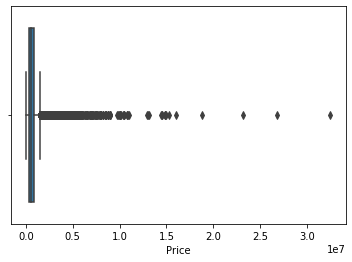

In [53]:
sns.boxplot(x=hd['Price'])


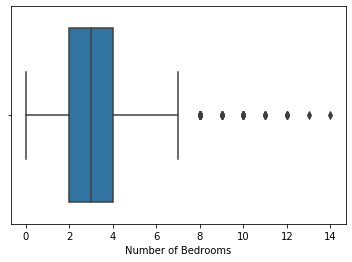

In [54]:
sns.boxplot(x=hd['Number of Bedrooms'])

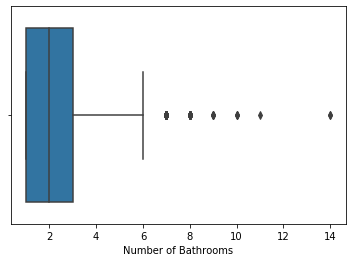

In [55]:
sns.boxplot(x=hd['Number of Bathrooms'])

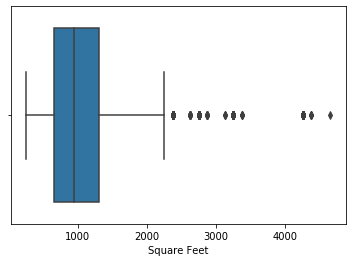

In [56]:
sns.boxplot(x=hd['Square Feet'])

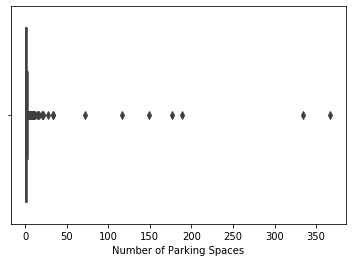

In [57]:
sns.boxplot(x=hd['Number of Parking Spaces'])

# Get Rid of Outliers

# Parking Spaces 
Spaces bigger than 3 are likely available places in appartment parking or public parking that residents can use. 
I replace number od parking spaces that is bigger than 3 my mean.

In [58]:
hd['Number of Parking Spaces'].unique()

array([  1.,   6.,  nan,   2.,   4.,   3.,   5.,  10.,   8.,   7.,   9.,
        15.,  20.,  33.,  72.,  11.,  17.,  28., 117., 334.,  12.,  14.,
       189.,  21., 177., 367., 149.,  22.])

In [59]:
PS_mean=hd['Number of Parking Spaces'].mean()
print('Mean for Number of Parking Spaces' , PS_mean)

Mean for Number of Parking Spaces 1.8849921630094044


In [60]:
hd.fillna(hd['Number of Parking Spaces'].mean())

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District
0,855000.00,870000.00,3.00,2.00,850.00,1.00,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",1.88,1.88,1.88
1,885000.00,898000.00,3.00,2.00,1.88,6.00,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",1.88,1.88,1.88
2,550000.00,549900.00,1.00,1.00,550.00,1.88,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",1.88,1.88,1.88
3,665000.00,600000.00,2.00,1.00,650.00,1.00,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",1.88,1.88,1.88
4,825513.00,839000.00,2.00,2.00,1.88,1.00,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",1.88,1.88,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42877,154900.00,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",45.35,-75.81,1.88
42878,624900.00,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,"5827 GLADEWOODS PLACE Ottawa, ON",45.44,-75.53,1.88
42879,899000.00,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,"6349 DEERMEADOW DRIVE Ottawa, ON",45.24,-75.60,1.88
42880,295000.00,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,"212 ALVIN ROAD Ottawa, ON",45.45,-75.65,1.88


In [61]:
hd['Number of Parking Spaces'].unique()

array([  1.,   6.,  nan,   2.,   4.,   3.,   5.,  10.,   8.,   7.,   9.,
        15.,  20.,  33.,  72.,  11.,  17.,  28., 117., 334.,  12.,  14.,
       189.,  21., 177., 367., 149.,  22.])

In [62]:
hd['Number of Parking Spaces'].describe()

count   15312.00
mean        1.88
std         4.97
min         1.00
25%         1.00
50%         1.00
75%         2.00
max       367.00
Name: Number of Parking Spaces, dtype: float64

In [63]:
#Replace nan values by Mean

In [64]:
hd['Number of Parking Spaces'].replace(np.nan, PS_mean, inplace=True)

In [65]:
hd['Number of Parking Spaces'].unique()

array([  1.        ,   6.        ,   1.88499216,   2.        ,
         4.        ,   3.        ,   5.        ,  10.        ,
         8.        ,   7.        ,   9.        ,  15.        ,
        20.        ,  33.        ,  72.        ,  11.        ,
        17.        ,  28.        , 117.        , 334.        ,
        12.        ,  14.        , 189.        ,  21.        ,
       177.        , 367.        , 149.        ,  22.        ])

In [66]:
#Replace values>3 by Mean

In [67]:
hd['Number of Parking Spaces'] = np.where(hd['Number of Parking Spaces'] >3, PS_mean,hd['Number of Parking Spaces'])

In [68]:
hd['Number of Parking Spaces'].describe()

count   42882.00
mean        1.73
std         0.42
min         1.00
25%         1.88
50%         1.88
75%         1.88
max         3.00
Name: Number of Parking Spaces, dtype: float64

In [69]:
hd['Number of Parking Spaces'].unique()

array([1.        , 1.88499216, 2.        , 3.        ])

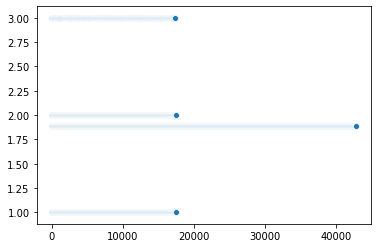

In [70]:
sns.scatterplot(data=hd['Number of Parking Spaces'])

Text(0.5, 1.0, 'Number of Parking Spaces bins')

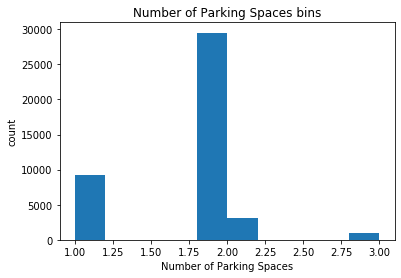

In [71]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(hd['Number of Parking Spaces'])
plt.pyplot.xlabel('Number of Parking Spaces')
plt.pyplot.ylabel('count')
plt.pyplot.title('Number of Parking Spaces bins')

# Square Feet


In [72]:
hd['Square Feet'].describe()

count   12207.00
mean     1124.60
std       696.52
min       250.00
25%       650.00
50%       950.00
75%      1300.00
max      4650.00
Name: Square Feet, dtype: float64

In [73]:
hd['Square Feet'].unique()

array([ 850.,   nan,  550.,  650.,  250., 2750., 1100., 1350., 3250.,
       1750.,  750.,  900., 2375., 1300.,  950., 2250., 1900., 2125.,
       1500., 4250., 1700., 4375.,  800., 2875., 3375., 2625.,  600.,
       3125., 1000., 1200., 4650.])

In [74]:
SF_mean=hd['Square Feet'].mean()
print('Mean for Square Feet' , SF_mean)

Mean for Square Feet 1124.6006389776358


In [75]:
# Replace nan by mean

In [76]:
hd['Square Feet'].replace(np.nan, SF_mean, inplace=True)

In [77]:
hd['Square Feet'].unique()

array([ 850.        , 1124.60063898,  550.        ,  650.        ,
        250.        , 2750.        , 1100.        , 1350.        ,
       3250.        , 1750.        ,  750.        ,  900.        ,
       2375.        , 1300.        ,  950.        , 2250.        ,
       1900.        , 2125.        , 1500.        , 4250.        ,
       1700.        , 4375.        ,  800.        , 2875.        ,
       3375.        , 2625.        ,  600.        , 3125.        ,
       1000.        , 1200.        , 4650.        ])

In [78]:
#Replace values> 1750 by mean

In [79]:
hd['Square Feet'] = np.where(hd['Square Feet'] > 1750, SF_mean,hd['Square Feet'])

In [80]:
hd['Square Feet'].describe()

count   42882.00
mean     1076.25
std       204.02
min       250.00
25%      1124.60
50%      1124.60
75%      1124.60
max      1750.00
Name: Square Feet, dtype: float64

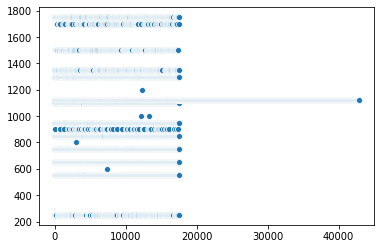

In [81]:
sns.scatterplot(data=hd['Square Feet'])

Text(0.5, 1.0, 'Square Feet bins')

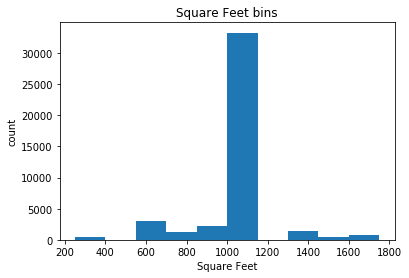

In [82]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(hd['Square Feet'])
plt.pyplot.xlabel('Square Feet')
plt.pyplot.ylabel('count')
plt.pyplot.title('Square Feet bins')

# Number of Bathrooms

In [83]:
hd['Number of Bathrooms'].describe()

count   17405.00
mean        2.13
std         1.13
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        14.00
Name: Number of Bathrooms, dtype: float64

In [84]:
hd['Number of Bathrooms'].unique()

array([ 2.,  1.,  5.,  4.,  3.,  6., nan,  8.,  7.,  9., 14., 10., 11.])

In [85]:
NB_mean=hd['Number of Bathrooms'].mean()
print('Mean for Number of Bathrooms' , NB_mean)

Mean for Number of Bathrooms 2.1322033898305084


In [86]:
#Replace nan by mean

In [87]:
hd['Number of Bathrooms'].replace(np.nan, NB_mean, inplace=True)

In [88]:
hd['Number of Bathrooms'].unique()

array([ 2.        ,  1.        ,  5.        ,  4.        ,  3.        ,
        6.        ,  2.13220339,  8.        ,  7.        ,  9.        ,
       14.        , 10.        , 11.        ])

In [89]:
#Replace values>6 by mean

In [90]:
hd['Number of Bathrooms'] = np.where(hd['Number of Bathrooms'] > 6, NB_mean,hd['Number of Bathrooms'])

In [91]:
hd['Number of Bathrooms'].describe()

count   42882.00
mean        2.12
std         0.67
min         1.00
25%         2.00
50%         2.13
75%         2.13
max         6.00
Name: Number of Bathrooms, dtype: float64

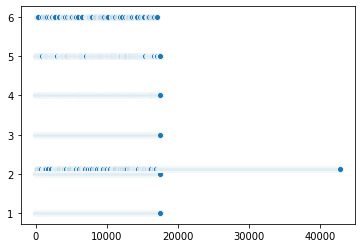

In [92]:
sns.scatterplot(data=hd['Number of Bathrooms'])

Text(0.5, 1.0, 'Number of Bathrooms bins')

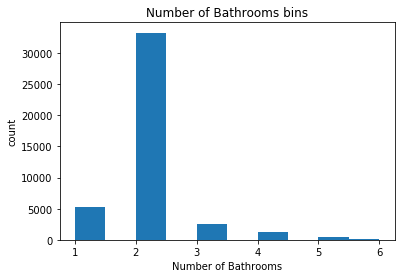

In [93]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(hd['Number of Bathrooms'])
plt.pyplot.xlabel('Number of Bathrooms')
plt.pyplot.ylabel('count')
plt.pyplot.title('Number of Bathrooms bins')

# Number of Bedrooms

In [94]:
hd['Number of Bedrooms'].describe()

count   17405.00
mean        2.89
std         1.41
min         0.00
25%         2.00
50%         3.00
75%         4.00
max        14.00
Name: Number of Bedrooms, dtype: float64

In [95]:
hd['Number of Bedrooms'].unique()

array([ 3.,  1.,  2.,  0.,  4.,  6.,  5.,  7., nan,  8., 11.,  9., 10.,
       14., 12., 13.])

In [96]:
NBed_mean=hd['Number of Bedrooms'].mean()
print('Mean for Number of Bedrooms' , NBed_mean)

Mean for Number of Bedrooms 2.8898592358517665


In [97]:
#Replace nan by mean

In [98]:
hd['Number of Bedrooms'].replace(np.nan, NBed_mean, inplace=True)

In [99]:
#Replace 0 by mean

In [100]:
hd['Number of Bedrooms'].replace(0, NBed_mean, inplace=True)

In [101]:
hd['Number of Bedrooms'].unique()

array([ 3.        ,  1.        ,  2.        ,  2.88985924,  4.        ,
        6.        ,  5.        ,  7.        ,  8.        , 11.        ,
        9.        , 10.        , 14.        , 12.        , 13.        ])

In [102]:
#Replace values>7 by mean

In [103]:
hd['Number of Bedrooms'] = np.where(hd['Number of Bedrooms'] > 7, NBed_mean,hd['Number of Bedrooms'])

In [104]:
hd['Number of Bedrooms'].describe()

count   42882.00
mean        2.89
std         0.83
min         1.00
25%         2.89
50%         2.89
75%         2.89
max         7.00
Name: Number of Bedrooms, dtype: float64

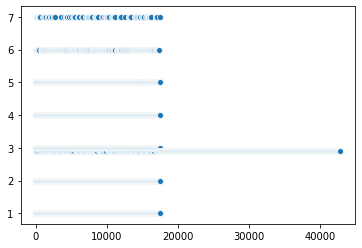

In [105]:
sns.scatterplot(data=hd['Number of Bedrooms'])

Text(0.5, 1.0, 'Number of Bedrooms bins')

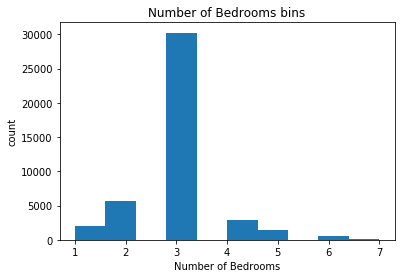

In [106]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(hd['Number of Bedrooms'])
plt.pyplot.xlabel('Number of Bedrooms')
plt.pyplot.ylabel('count')
plt.pyplot.title('Number of Bedrooms bins')

# Price

In [107]:
hd['Price'].describe()

count      42756.00
mean      695775.31
std       779481.11
min            0.00
25%       319900.00
50%       529000.00
75%       810000.00
max     32500000.00
Name: Price, dtype: float64

In [108]:
P_mean=hd['Price'].mean()
print('Mean for Price' , P_mean)

Mean for Price 695775.3050098232


In [109]:
hd['Price'].unique()

array([855000., 885000., 550000., ..., 799997., 240500., 384888.])

In [110]:
# Decrease price scale for creating boxplot

In [111]:
hd['Price in Thousands'] = ['{:,.2f}'.format(x) for x in hd['Price']/1000]
hd

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands
0,855000.00,870000.00,3.00,2.00,850.00,1.00,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,855.00
1,885000.00,898000.00,3.00,2.00,1124.60,1.88,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,885.00
2,550000.00,549900.00,1.00,1.00,550.00,1.88,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,550.00
3,665000.00,600000.00,2.00,1.00,650.00,1.00,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",nan,nan,nan,665.00
4,825513.00,839000.00,2.00,2.00,1124.60,1.00,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",nan,nan,nan,825.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42877,154900.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",45.35,-75.81,nan,154.90
42878,624900.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"5827 GLADEWOODS PLACE Ottawa, ON",45.44,-75.53,nan,624.90
42879,899000.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"6349 DEERMEADOW DRIVE Ottawa, ON",45.24,-75.60,nan,899.00
42880,295000.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"212 ALVIN ROAD Ottawa, ON",45.45,-75.65,nan,295.00


In [112]:
hd['Price in Thousands'].unique()

array(['855.00', '885.00', '550.00', ..., '300.53', '240.50', '384.89'],
      dtype=object)

In [113]:
#Changing type into numeric for future analysis

In [114]:
hd['Price in Thousands'] = pd.to_numeric(hd['Price in Thousands'], errors='coerce')


In [115]:
hd.dtypes

Price                       float64
Listing Price               float64
Number of Bedrooms          float64
Number of Bathrooms         float64
Square Feet                 float64
Number of Parking Spaces    float64
Description                  object
MLS                          object
Building Type                object
Address                      object
Latitude                    float64
Longitude                   float64
City District               float64
Price in Thousands          float64
dtype: object

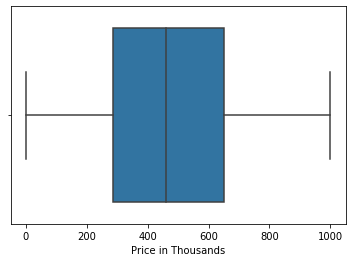

In [116]:
sns.boxplot(x=hd['Price in Thousands'])

# Listing Price

In [117]:
#Making Listing Price variable is identical with Price

In [118]:
hd['Listing Price'].describe()

count      17405.00
mean      879575.09
std       637725.69
min       104900.00
25%       529900.00
50%       699900.00
75%       979000.00
max     13180000.00
Name: Listing Price, dtype: float64

In [119]:
LP_mean=hd['Listing Price'].mean()
print('Mean for Listing Price' , LP_mean)

Mean for Listing Price 879575.0933065211


In [120]:
# Decrease Listing price scale for creating boxplot

In [121]:
hd['Listing Price in Thousands'] = ['{:,.2f}'.format(x) for x in hd['Listing Price']/1000]
hd

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands
0,855000.00,870000.00,3.00,2.00,850.00,1.00,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,855.00,870.00
1,885000.00,898000.00,3.00,2.00,1124.60,1.88,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,885.00,898.00
2,550000.00,549900.00,1.00,1.00,550.00,1.88,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,550.00,549.90
3,665000.00,600000.00,2.00,1.00,650.00,1.00,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",nan,nan,nan,665.00,600.00
4,825513.00,839000.00,2.00,2.00,1124.60,1.00,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",nan,nan,nan,825.51,839.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42877,154900.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",45.35,-75.81,nan,154.90,nan
42878,624900.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"5827 GLADEWOODS PLACE Ottawa, ON",45.44,-75.53,nan,624.90,nan
42879,899000.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"6349 DEERMEADOW DRIVE Ottawa, ON",45.24,-75.60,nan,899.00,nan
42880,295000.00,nan,2.89,2.13,1124.60,1.88,NaN,NaN,NaN,"212 ALVIN ROAD Ottawa, ON",45.45,-75.65,nan,295.00,nan


In [122]:
hd['Listing Price in Thousands'].unique()

array(['870.00', '898.00', '549.90', ..., '1,619.90', '308.00', '559.98'],
      dtype=object)

In [123]:
#Changing type into numeric for future analysis

In [124]:
hd['Listing Price in Thousands'] = pd.to_numeric(hd['Listing Price in Thousands'], errors='coerce')

In [125]:
hd.dtypes

Price                         float64
Listing Price                 float64
Number of Bedrooms            float64
Number of Bathrooms           float64
Square Feet                   float64
Number of Parking Spaces      float64
Description                    object
MLS                            object
Building Type                  object
Address                        object
Latitude                      float64
Longitude                     float64
City District                 float64
Price in Thousands            float64
Listing Price in Thousands    float64
dtype: object

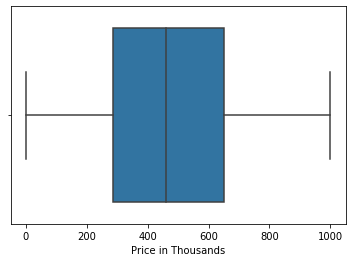

In [126]:
sns.boxplot(x=hd['Price in Thousands'])

# Examine categotical var. Building Type

In [127]:
hd['Building Type'].unique()

array(['Condo', 'Semi-Detached', 'Detached', 'Duplex', nan,
       'Att/Row/Twnhouse', 'Link', 'Apt', 'Multiplex', 'Triplex',
       'Store W/Apt/Offc', 'Fourplex', 'Cottage'], dtype=object)

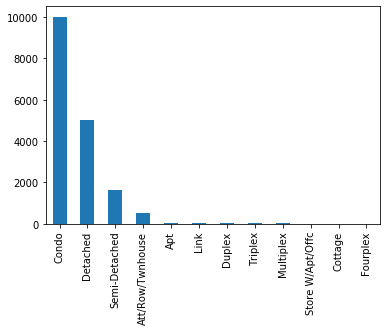

In [128]:
hd['Building Type'].value_counts().plot(kind='bar')

# Data Normalization


In [129]:
hd['Price']=hd['Price']/hd['Price'].max()
hd['Listing Price']=hd['Listing Price']/hd['Listing Price'].max()
hd['Price in Thousands']=hd['Price in Thousands']/hd['Price in Thousands'].max()
hd['Listing Price in Thousands']=hd['Listing Price in Thousands']/hd['Listing Price in Thousands'].max()
hd['Number of Bedrooms']=hd['Number of Bedrooms']/hd['Number of Bedrooms'].max()
hd['Number of Bathrooms']=hd['Number of Bathrooms']/hd['Number of Bathrooms'].max()
hd['Square Feet']=hd['Square Feet']/hd['Square Feet'].max()
hd['Number of Parking Spaces']=hd['Number of Parking Spaces']/hd['Number of Parking Spaces'].max()

In [130]:
hd.head(5)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55
3,0.02,0.05,0.29,0.17,0.37,0.33,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo,"65 East Liberty St, Toronto",nan,nan,nan,0.67,0.60
4,0.03,0.06,0.29,0.33,0.64,0.33,Location! Location! Location. Your Cottage In ...,W4519375,Detached,"61 Twelfth St, Toronto",nan,nan,nan,0.83,0.84


In [131]:
#Look how data statistics looks now:

In [132]:
pd.options.display.float_format = "{:.2f}".format
hd.describe()

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands
count,42756.00,17405.00,42882.00,42882.00,42882.00,42882.00,25351.00,25351.00,0.00,35808.00,13570.00
mean,0.02,0.07,0.41,0.35,0.62,0.58,37.33,-85.22,nan,0.47,0.64
std,0.02,0.05,0.12,0.11,0.12,0.14,82.86,73.09,nan,0.25,0.18
min,0.00,0.01,0.14,0.17,0.14,0.33,-999.00,-999.00,nan,0.00,0.10
25%,0.01,0.04,0.41,0.33,0.64,0.63,43.40,-80.31,nan,0.28,0.50
50%,0.02,0.05,0.41,0.36,0.64,0.63,43.72,-79.50,nan,0.46,0.63
75%,0.02,0.07,0.41,0.36,0.64,0.63,44.47,-79.11,nan,0.65,0.79
max,1.00,1.00,1.00,1.00,1.00,1.00,53.85,1.07,nan,1.00,1.00


In [133]:
np.any(np.isnan(hd['Price']))

True

In [134]:
np.all(np.isfinite(hd['Price']))

False

In [135]:
hd['Price'].fillna(hd['Price'].mean())

0       0.03
1       0.03
2       0.02
3       0.02
4       0.03
        ... 
42877   0.00
42878   0.02
42879   0.03
42880   0.01
42881   0.05
Name: Price, Length: 42882, dtype: float64

In [136]:
np.any(np.isnan(hd['Number of Bedrooms']))

False

In [137]:
hd['Price'].replace(np.nan, hd['Price'].mean(), inplace=True)

In [138]:
np.any(np.isnan(hd['Price']))

False

In [139]:
np.all(np.isfinite(hd['Price']))

True

Text(0.5, 1.0, 'Number of Parking Spaces bins')

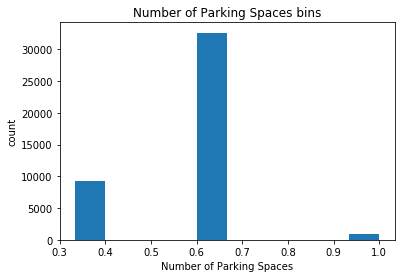

In [140]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(hd['Number of Parking Spaces'])
plt.pyplot.xlabel('Number of Parking Spaces')
plt.pyplot.ylabel('count')
plt.pyplot.title('Number of Parking Spaces bins')

In [141]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55


# Data Transformation

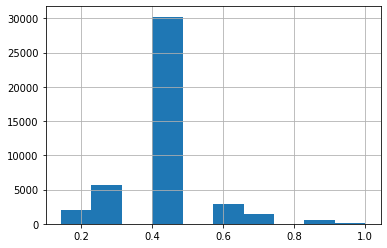

In [142]:
import seaborn as sns
hd['Number of Bedrooms'].hist(grid='False')

In [143]:
hd['Number of Bedrooms'].skew()

1.0247117070781633

In [144]:
#Skewness is the measure of lack of symmetry. As, the value of skew is greater than 0.5, it doesn't lie in the range of -0.5 to 0.5 so it is Positive Skewness

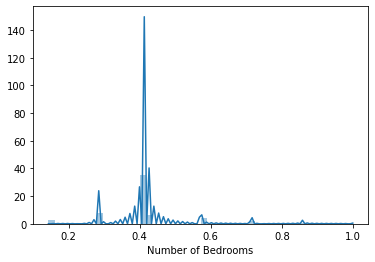

In [145]:
# density plot
sns.distplot(hd['Number of Bedrooms'], hist=True)


In [146]:
#For positive skewness

In [147]:
# 1. Log Transformations :

In [148]:
log_bed = np.log(hd['Number of Bedrooms'])
log_bed.head()

0   -0.85
1   -0.85
2   -1.95
3   -1.25
4   -1.25
Name: Number of Bedrooms, dtype: float64

In [149]:
log_bed.skew()

-1.2244687709875064

In [150]:
#2. Root Transformation

In [151]:
sqrt_bed = np.sqrt(hd['Number of Bedrooms'])
sqrt_bed.head()

0   0.65
1   0.65
2   0.38
3   0.53
4   0.53
Name: Number of Bedrooms, dtype: float64

In [152]:
sqrt_bed.skew()

-0.1145643717255944

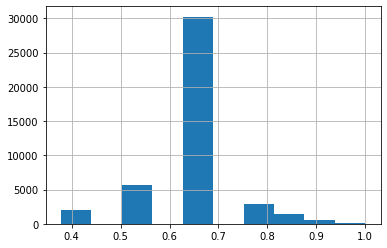

In [153]:
sqrt_bed.hist(grid='False')

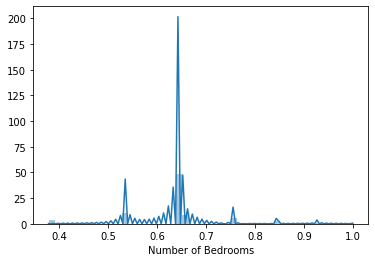

In [154]:
sns.distplot(sqrt_bed, hist = True)

In [155]:
hd['Number of Bedrooms_transformed']=sqrt_bed

In [156]:
#cbrt_bed = np.cbrt(hd['Number of Bedrooms'])
#cbrt_bed.head()

In [157]:
#cbrt_bed.skew()

In [158]:
#sns.distplot(cbrt_bed, hist= True)

In [159]:
#log > cube Root > square root

In [160]:
#log_bed.skew(),cbrt_bed.skew(), sqrt_bed.skew()

In [161]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands,Number of Bedrooms_transformed
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87,0.65
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90,0.65
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55,0.38


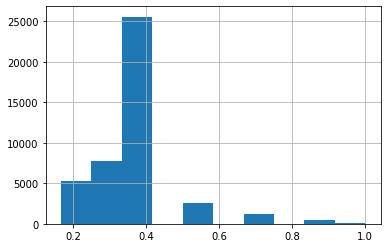

In [162]:
import seaborn as sns
hd['Number of Bathrooms'].hist(grid='False')

In [163]:
hd['Number of Bathrooms'].skew()

1.7391557708677061

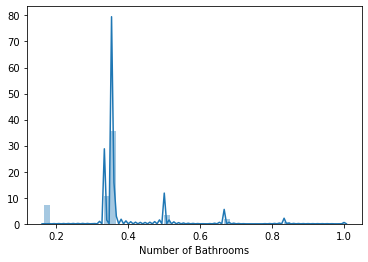

In [164]:
sns.distplot(hd['Number of Bathrooms'], hist=True)

In [165]:
sqrt_bath = np.sqrt(hd['Number of Bathrooms'])
sqrt_bath.head()

0   0.58
1   0.58
2   0.41
3   0.41
4   0.58
Name: Number of Bathrooms, dtype: float64

In [166]:
sqrt_bath.skew()

0.48422552463484025

In [167]:
hd['Number of Bathrooms_transformed']=sqrt_bath

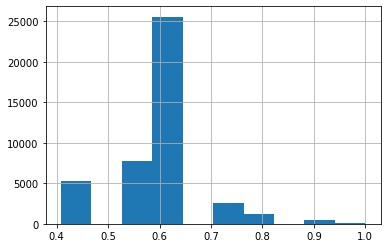

In [168]:
hd['Number of Bathrooms_transformed'].hist(grid='False')

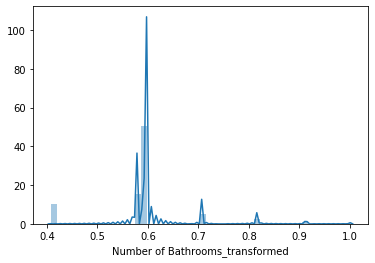

In [169]:
sns.distplot(hd['Number of Bathrooms_transformed'], hist=True)

In [170]:
#hd['Square Feet'].hist(grid='False')

In [171]:
#hd['Square Feet'].skew()

In [172]:
#Negative skew: sgrt - cbrt - log

In [173]:
#sqrt_sq = np.sqrt(hd['Square Feet'])
#sqrt_sq.head()

In [174]:
#sqrt_sq.skew()

In [175]:
#cbrt_sq = np.cbrt(hd['Square Feet'])
#cbrt_sq.skew()

In [176]:
#log_sq = np.log(sqrt_sq)
#log_sq.skew()

In [177]:
#Try box cox

In [178]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(1, figsize=[16,3])

#plt.subplots_adjust(hspace=0.4)
#sns.distplot(hd['Square Feet'], fit=stats.norm)
#plt.title('Distribution ')
#(mu, sigma) = stats.norm.fit(hd['Square Feet'])
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')

#plt.figure(2, figsize=[16,3])

#ax1=plt.subplot(1,2,1)
#x = hd['Square Feet']
#stats.probplot(x, dist=stats.norm, plot=ax1)
#ax1.set_xlabel('')
#ax1.set_title('Probplot against normal distribution')

#ax2=plt.subplot(1,2,2)
#boxcox_lambda = stats.boxcox_normmax(x, brack=(1.0, 2.0), method='mle')
#transformed_array = stats.boxcox(x, boxcox_lambda)
# To transform back
# np.exp(np.log(boxcox_lambda*transformed_array+1)/boxcox_lambda)
#stats.probplot(transformed_array, dist=stats.norm , plot=ax2)
#ax2.set_title('Probplot after Box-Cox transformation')
#hd['Square Feet_transformed'] = transformed_array

#plt.figure(3, figsize=[16,3])
#sns.distplot(hd['Square Feet_transformed'], fit=stats.norm)
#plt.title('Distribution')
#(mu, sigma) = stats.norm.fit(hd['Square Feet_transformed'])
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
#plt.show()



In [179]:
#hd['Square Feet_transformed'].skew()

In [180]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands,Number of Bedrooms_transformed,Number of Bathrooms_transformed
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87,0.65,0.58
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90,0.65,0.58
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55,0.38,0.41


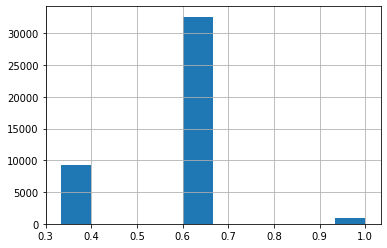

In [181]:
import seaborn as sns
hd['Number of Parking Spaces'].hist(grid='False')

In [182]:
hd['Number of Parking Spaces'].skew()

-0.4514147726512114

In [183]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands,Number of Bedrooms_transformed,Number of Bathrooms_transformed
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87,0.65,0.58
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90,0.65,0.58
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55,0.38,0.41


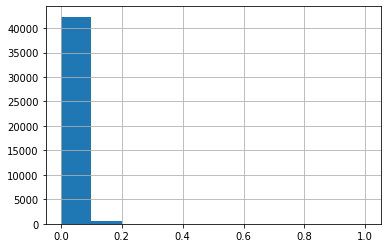

In [184]:
import seaborn as sns
hd['Price'].hist(grid='False')

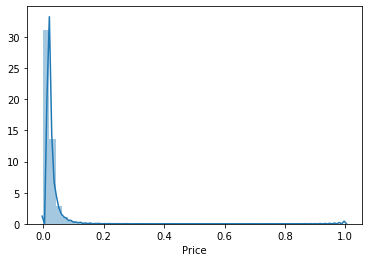

In [185]:
sns.distplot(hd['Price'], hist=True)

In [186]:
hd['Price'].skew()

8.211626038868252

In [187]:
log_price = np.log(hd['Price'])
log_price.skew()

nan

In [188]:
sqrt_price = np.sqrt(hd['Price'])
sqrt_price.skew()

1.5463393202518

In [189]:
cbrt_price = np.cbrt(hd['Price'])
cbrt_price.skew()

0.2849707371102665

In [190]:
hd['Price_transformed']=cbrt_price

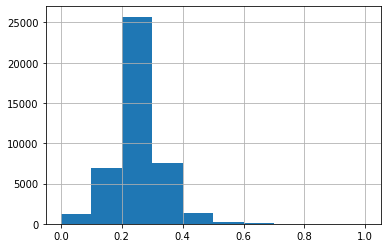

In [191]:
hd['Price_transformed'].hist(grid='False')

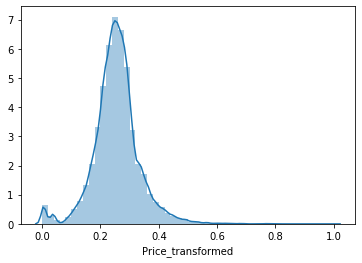

In [192]:
sns.distplot(hd['Price_transformed'], hist=True)

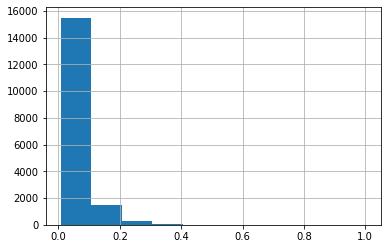

In [193]:
hd['Listing Price'].hist(grid='False')

In [194]:
hd['Listing Price'].skew()

4.45066834334544

In [195]:
log_lisprice = np.log(hd['Listing Price'])
log_lisprice.skew()

0.840199049111761

In [196]:
sqrt_lisprice = np.sqrt(hd['Listing Price'])
sqrt_lisprice.skew()

2.070405557452441

In [197]:
cbrt_lisprice = np.cbrt(hd['Listing Price'])
cbrt_lisprice.skew()

1.5943268276735503

In [198]:
hd['Listing Price_transformed']=cbrt_lisprice

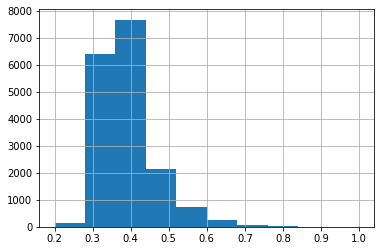

In [199]:
hd['Listing Price_transformed'].hist(grid='False')

In [200]:
hd.dtypes

Price                              float64
Listing Price                      float64
Number of Bedrooms                 float64
Number of Bathrooms                float64
Square Feet                        float64
Number of Parking Spaces           float64
Description                         object
MLS                                 object
Building Type                       object
Address                             object
Latitude                           float64
Longitude                          float64
City District                      float64
Price in Thousands                 float64
Listing Price in Thousands         float64
Number of Bedrooms_transformed     float64
Number of Bathrooms_transformed    float64
Price_transformed                  float64
Listing Price_transformed          float64
dtype: object

In [201]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands,Number of Bedrooms_transformed,Number of Bathrooms_transformed,Price_transformed,Listing Price_transformed
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87,0.65,0.58,0.30,0.40
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90,0.65,0.58,0.30,0.41
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55,0.38,0.41,0.26,0.35


# Explore Data

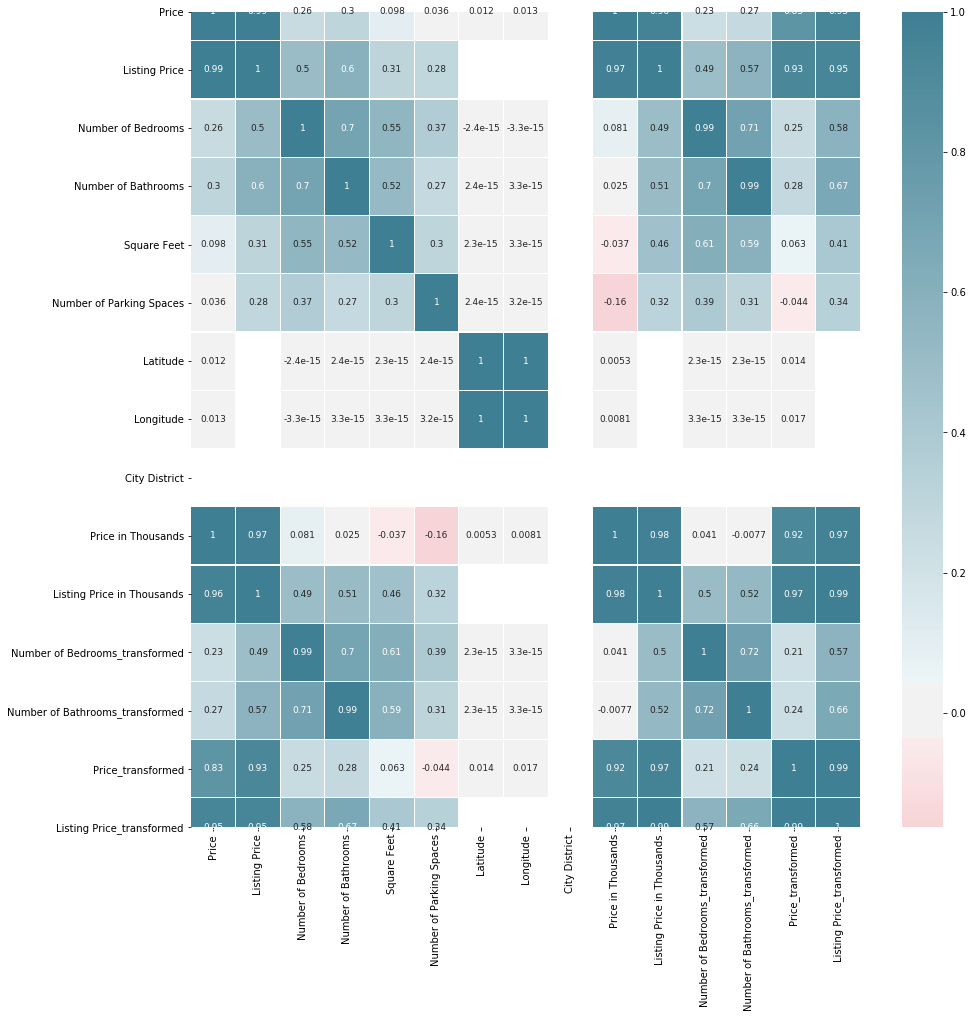

In [243]:
def correlantion_heatmap(hd, center = None):
    fig, ax = plt.subplots(figsize = [15,15])
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    fig = sns.heatmap(hd.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
correlantion_heatmap(hd, center=0)

In [244]:
hd[['Square Feet', 'Number of Parking Spaces', 'Number of Bedrooms_transformed', 
    'Number of Bathrooms_transformed', 'Price_transformed', 'Listing Price_transformed']].corr()

,Square Feet,Number of Parking Spaces,Number of Bedrooms_transformed,Number of Bathrooms_transformed,Price_transformed,Listing Price_transformed
Square Feet,1.00,0.30,0.61,0.59,0.06,0.41
Number of Parking Spaces,0.30,1.00,0.39,0.31,-0.04,0.34
Number of Bedrooms_transformed,0.61,0.39,1.00,0.72,0.21,0.57
Number of Bathrooms_transformed,0.59,0.31,0.72,1.00,0.24,0.66
Price_transformed,0.06,-0.04,0.21,0.24,1.00,0.99
Listing Price_transformed,0.41,0.34,0.57,0.66,0.99,1.00


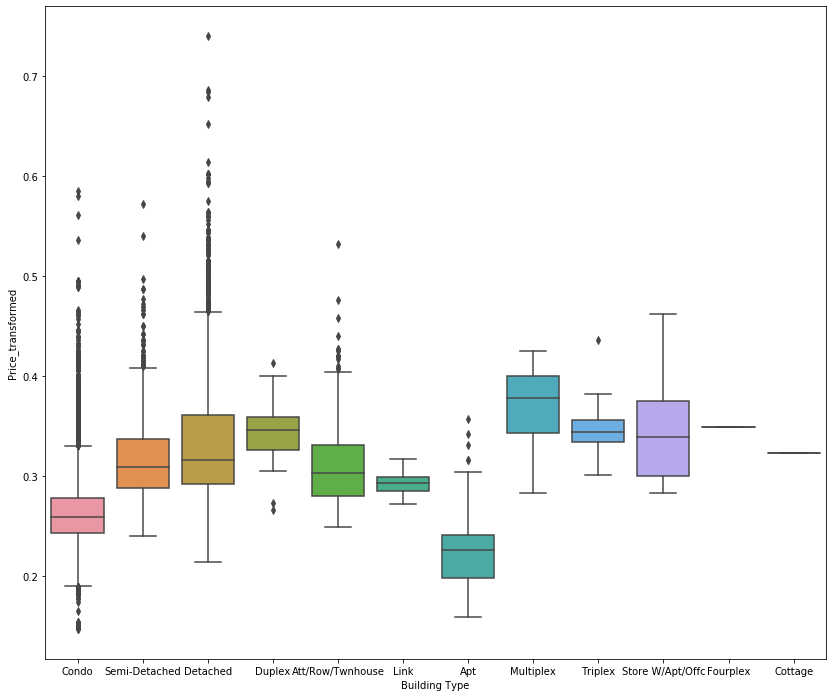

In [245]:
 fig, ax = plt.subplots(figsize = [14,12])
sns.boxplot(x=hd['Building Type'], y=hd['Price_transformed'], data=hd)

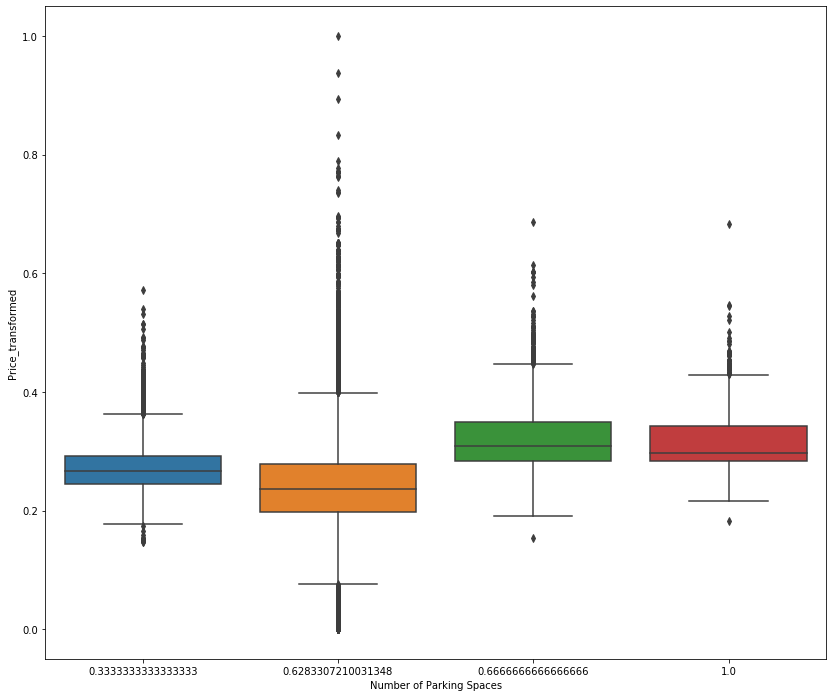

In [246]:
fig, ax = plt.subplots(figsize = [14,12])
sns.boxplot(x=hd['Number of Parking Spaces'], y=hd['Price_transformed'], data=hd)

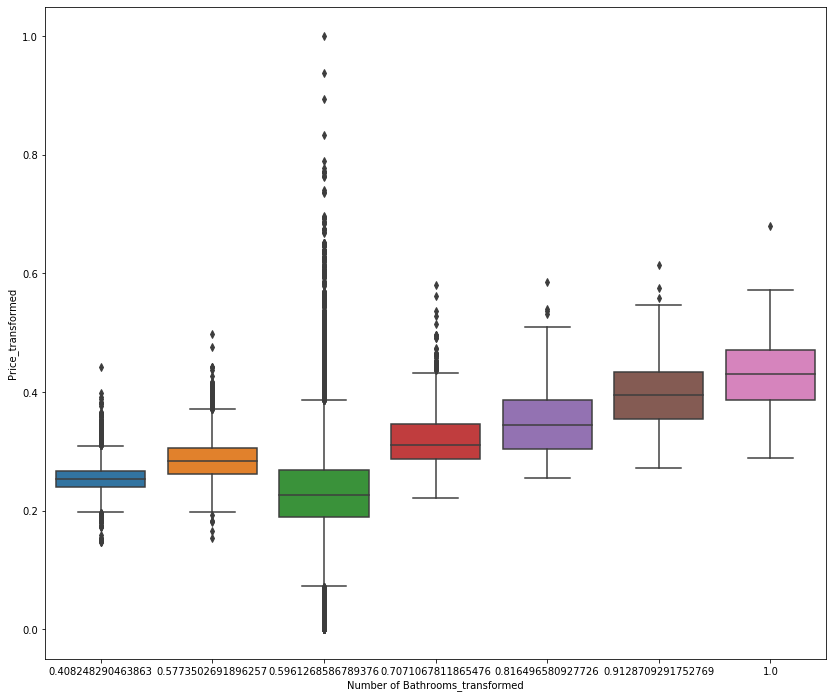

In [247]:
fig, ax = plt.subplots(figsize = [14,12])
sns.boxplot(x=hd['Number of Bathrooms_transformed'], y=hd['Price_transformed'], data=hd)

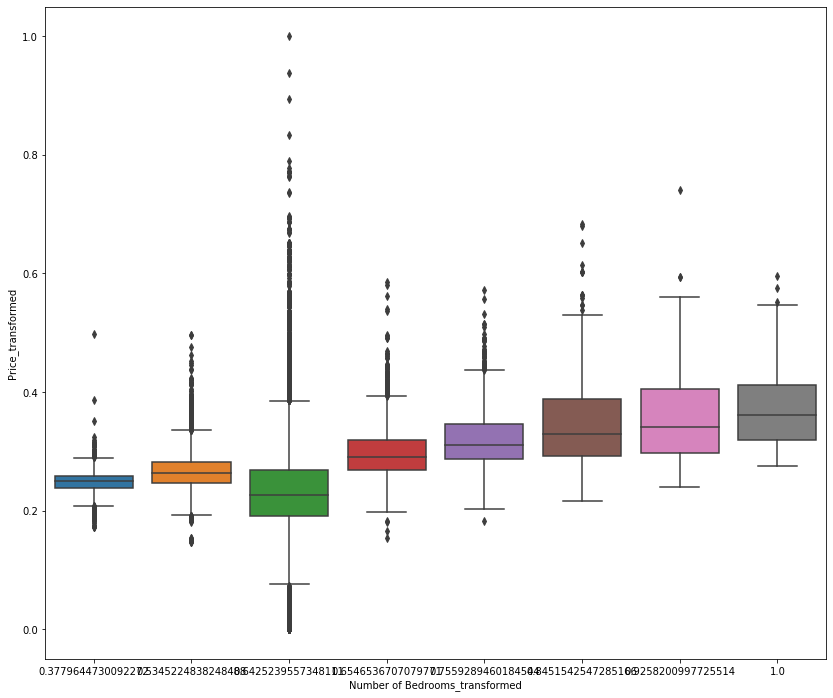

In [248]:
 fig, ax = plt.subplots(figsize = [14,12])
sns.boxplot(x=hd['Number of Bedrooms_transformed'], y=hd['Price_transformed'], data=hd)

# Multiple Regression Model 

In [202]:
cdf = hd[['Price_transformed','Number of Bedrooms_transformed','Number of Bathrooms_transformed','Square Feet', 'Number of Parking Spaces']]
cdf.head(9)

,Price_transformed,Number of Bedrooms_transformed,Number of Bathrooms_transformed,Square Feet,Number of Parking Spaces
0,0.30,0.65,0.58,0.49,0.33
1,0.30,0.65,0.58,0.64,0.63
2,0.26,0.38,0.41,0.31,0.63
3,0.27,0.53,0.41,0.37,0.33
4,0.29,0.53,0.58,0.64,0.33
5,0.22,0.64,0.41,0.14,0.33
6,0.44,0.76,0.91,0.64,0.67
7,0.18,0.65,0.58,0.63,0.33
8,0.31,0.53,0.58,0.77,0.33


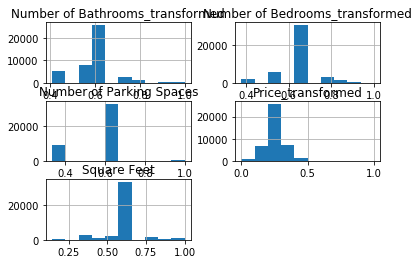

In [203]:
import matplotlib.pyplot as plt
viz = cdf[['Price_transformed','Number of Bedrooms_transformed','Number of Bathrooms_transformed','Square Feet', 'Number of Parking Spaces']]
viz.hist()
plt.show()

In [204]:
#Creating train and test dataset

In [205]:
msk = np.random.rand(len(hd)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [206]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Number of Bedrooms_transformed', 'Number of Bathrooms_transformed', 'Square Feet', 'Number of Parking Spaces']])
y = np.asanyarray(train[['Price_transformed']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.1755994   0.19564629 -0.1026635  -0.0831022 ]]


In [207]:
y_hat= regr.predict(test[['Number of Bedrooms_transformed', 'Number of Bathrooms_transformed', 'Square Feet', 'Number of Parking Spaces']])
x = np.asanyarray(test[['Number of Bedrooms_transformed', 'Number of Bathrooms_transformed', 'Square Feet', 'Number of Parking Spaces']])
y = np.asanyarray(test[['Price_transformed']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.01
Variance score: 0.09


In [208]:
#Variance score is low - bad predictor

# Polynominal Regression and Pipelines

In [218]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 0.5, 1)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    plt.close()

In [219]:
x = hd['Number of Bedrooms_transformed']
y = hd['Price_transformed']

In [220]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3         2
-0.4584 x + 1.856 x - 1.587 x + 0.623


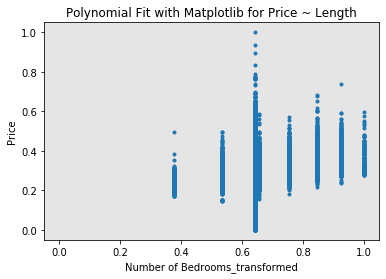

In [221]:
PlotPolly(p, x, y, 'Number of Bedrooms_transformed')

In [222]:
np.polyfit(x, y, 3)

array([-0.45842965,  1.85628022, -1.58731619,  0.62303119])

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [224]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [225]:
from sklearn.metrics import r2_score

In [226]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.103649456666286


In [227]:
# Only ~ 10 % of the variation of price is explained by this polynomial fit

# Classification K nearest neighbor (KNN) 

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
X = hd[['Number of Bedrooms_transformed', 'Number of Bathrooms_transformed']] .values  #.astype(float)
X[0:5]

array([[0.65465367, 0.57735027],
       [0.65465367, 0.57735027],
       [0.37796447, 0.40824829],
       [0.53452248, 0.40824829],
       [0.53452248, 0.57735027]])

In [230]:
y = hd['Price_transformed'].values
y[0:5]

array([0.29741366, 0.30085228, 0.25673975, 0.27351392, 0.29395455])

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (34305, 2) (34305,)
Test set: (8577, 2) (8577,)


In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [233]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [234]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[2019 2866 1895 ... 2660 3207 2186]
continuous
binary
multiclass


In [235]:
lab_enc = preprocessing.LabelEncoder()
testing_scores_encoded = lab_enc.fit_transform(y_test)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(testing_scores_encoded))

[2019 2866 1895 ... 2660 3207 2186]
continuous
binary
multiclass


In [236]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,training_scores_encoded)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [237]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 109,  109,  109,  109, 2414], dtype=int64)

In [238]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(training_scores_encoded, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(testing_scores_encoded, yhat))

Train set Accuracy:  0.0032939804693193414
Test set Accuracy:  0.0003497726477789437


In [239]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,training_scores_encoded)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(testing_scores_encoded, yhat)

    
    std_acc[n-1]=np.std(yhat==testing_scores_encoded)/np.sqrt(yhat.shape[0])

mean_acc

array([0.00011659, 0.00011659, 0.00034977, 0.00034977, 0.00069955,
       0.00069955, 0.00069955, 0.00069955, 0.00069955])

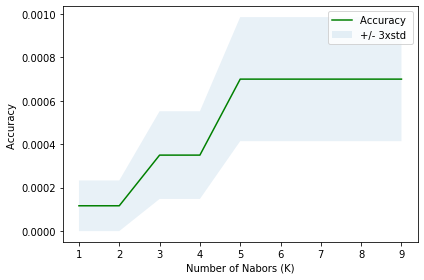

In [240]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [241]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.0006995452955578874 with k= 5


In [242]:
# Not a good model

# Classification SVM Support Vector Machines

In [249]:
#Binning price

In [250]:
bins=np.linspace(min(hd['Price_transformed']), max(hd['Price_transformed']), 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [251]:
group_names=['Low', 'Medium', 'High']

In [252]:
hd['Price_transformed-binned']=pd.cut(hd['Price_transformed'], bins, labels=group_names, include_lowest=True)
hd[['Price_transformed', 'Price_transformed-binned']].head(10)

,Price_transformed,Price_transformed-binned
0,0.30,Low
1,0.30,Low
2,0.26,Low
3,0.27,Low
4,0.29,Low
5,0.22,Low
6,0.44,Medium
7,0.18,Low
8,0.31,Low
9,0.20,Low


In [253]:
hd['Price_transformed-binned'].value_counts()

Low       37763
Medium     5087
High         32
Name: Price_transformed-binned, dtype: int64

Text(0.5, 1.0, 'Price_transformed-binned')

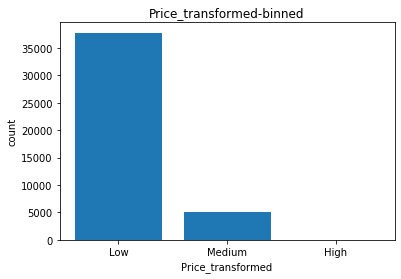

In [254]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, hd['Price_transformed-binned']. value_counts())
plt.pyplot.xlabel('Price_transformed')
plt.pyplot.ylabel('count')
plt.pyplot.title('Price_transformed-binned')

In [255]:
hd.head(3)

,Price,Listing Price,Number of Bedrooms,Number of Bathrooms,Square Feet,Number of Parking Spaces,Description,MLS,Building Type,Address,Latitude,Longitude,City District,Price in Thousands,Listing Price in Thousands,Number of Bedrooms_transformed,Number of Bathrooms_transformed,Price_transformed,Listing Price_transformed,Price_transformed-binned
0,0.03,0.07,0.43,0.33,0.49,0.33,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo,"38 Grenville St, Toronto",nan,nan,nan,0.86,0.87,0.65,0.58,0.30,0.40,Low
1,0.03,0.07,0.43,0.33,0.64,0.63,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,"2 Cabot Crt, Toronto",nan,nan,nan,0.89,0.90,0.65,0.58,0.30,0.41,Low
2,0.02,0.04,0.14,0.17,0.31,0.63,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo,"30 Roehampton Ave, Toronto",nan,nan,nan,0.55,0.55,0.38,0.41,0.26,0.35,Low


In [256]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

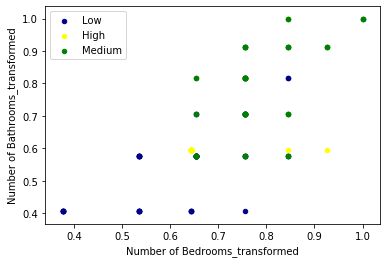

In [257]:
ax = hd[hd['Price_transformed-binned'] == 'Low'][0:50].plot(kind='scatter', 
        x='Number of Bedrooms_transformed', y='Number of Bathrooms_transformed', color='DarkBlue', label='Low');
hd[hd['Price_transformed-binned'] == 'High'][0:50].plot(kind='scatter', 
        x='Number of Bedrooms_transformed', y='Number of Bathrooms_transformed', color='Yellow', label='High', ax=ax);
hd[hd['Price_transformed-binned'] == 'Medium'][0:50].plot(kind='scatter', 
        x='Number of Bedrooms_transformed', y='Number of Bathrooms_transformed', color='Green', label='Medium', ax=ax);
plt.show()

In [258]:
feature_hd = hd[['Number of Bedrooms_transformed', 'Number of Bathrooms_transformed']]
X = np.asarray(feature_hd)
X[0:5]

array([[0.65465367, 0.57735027],
       [0.65465367, 0.57735027],
       [0.37796447, 0.40824829],
       [0.53452248, 0.40824829],
       [0.53452248, 0.57735027]])

In [259]:
y = np.asarray(hd['Price_transformed-binned'])
y [0:5]

array(['Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [260]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (34305, 2) (34305,)
Test set: (8577, 2) (8577,)


In [262]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [263]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [264]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [265]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
         Low       0.90      0.99      0.94      7553
      Medium       0.68      0.22      0.34      1017

    accuracy                           0.89      8577
   macro avg       0.53      0.40      0.43      8577
weighted avg       0.88      0.89      0.87      8577

Confusion matrix, without normalization
[[7447    0  106]
 [   6    0    1]
 [ 790    0  227]]


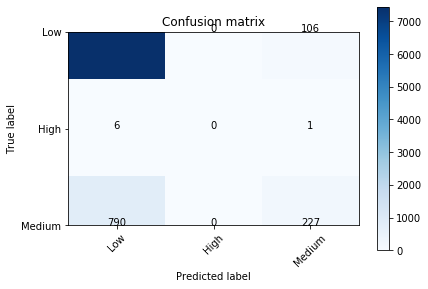

In [266]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Low','High', 'Medium'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low','High', 'Medium'],normalize= False,  title='Confusion matrix')

In [267]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8701714742624754

In [268]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\timohakartoha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8947184330185379

In [ ]:
#Model is working

# Map

In [269]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\timohakartoha\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                4.8.4-py37hc8dfbb8_1 --> 4.8.4-py37hc8dfbb8_2




conda-4.8.4          | 3.1 MB    |            |   0% 
conda-4.8.4          | 3.1 MB    |            |   1% 
conda-4.8.4          | 3.1 MB    | #9         |  19% 
conda-4.8.4          | 3.1 MB    | #####6     |  56% 
conda-4.8.4          | 3.1 MB    | #########1 |  91% 
conda-4.8.4          | 3.1 MB    | ########## | 100% 
Preparing transaction: ...wo

In [270]:
Lon_mean= hd['Longitude'].mean()
Lon_mean

hd['Longitude'] = np.where(hd['Longitude'] <-900, Lon_mean, hd['Longitude'])

hd['Longitude'].describe()

Lat_mean= hd['Latitude'].mean()
Lat_mean

hd['Latitude'] = np.where(hd['Latitude'] <-900, Lat_mean, hd['Latitude'])

In [271]:
hd['Longitude'].replace(np.nan, Lon_mean, inplace=True)

In [272]:
hd['Latitude'].replace(np.nan, Lat_mean, inplace=True)

In [273]:
world_map = folium.Map()

world_map

In [274]:
latitude = 43.65
longitude = -79.35

In [275]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
toronto_map

In [276]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [277]:
m1=folium.Map(width=550,height=350,location=[43.65, -79.35],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [278]:
hd = hd[hd.Longitude != 0]

In [279]:
hd = hd[hd.Latitude != 0]

In [280]:
hd.dropna(subset = ["Longitude"], inplace=True)

In [281]:
hd.dropna(subset = ["Latitude"], inplace=True)

In [ ]:
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[43.65, -79.35],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)
for lat, lng, in zip(hd['Latitude'], hd['Longitude']):
   folium.Marker(location=[lat, lng],popup='Default popup Marker1').add_to(m3)

m3